In [ ]:
# Design_He_normal_wb

In [ ]:
import os

cuda_device = '2'

os.environ["CUDA_VISIBLE_DEVICES"] = cuda_device
os.environ['CUBLAS_WORKSPACE_CONFIG']=':4096:8'

import torch

import numpy as np

from para_init import parameters, setup_seed
from permutation import permutation_train


In [ ]:
import torch.multiprocessing as mp
num_processes = 10

width_vector = [10, 20, 40, 80, 160, 320, 640, 1280]
batch_size = 8

result_matrix = np.zeros((len(width_vector), 10, 2))

i = 0

for width in width_vector:
    
    setup_seed(2022)
    
    shared_params = parameters()
    
    shared_params.width = width
    shared_params.batch_size = batch_size
    shared_params.adjust_scale = 0
            
    if __name__ == "__main__":
        
        mp.set_start_method('spawn', force=True)
        
        manager = mp.Manager()
        results_queue = manager.Queue()

        mp.spawn(permutation_train, args=(shared_params, results_queue), nprocs=num_processes, join=True)
        
        while not results_queue.empty():
            (idx, (error, error_infty)) = results_queue.get()
            result_matrix[i, idx, :] = [error, error_infty]

    i += 1


    

In [ ]:
print(result_matrix)

(8, 10, 2)
1.1315319521372207
<class 'numpy.ndarray'>
0.0
[0.13380179 0.22564257 0.21876953 0.16516413 0.16999403 0.16675108
 0.20702961 0.20109574]
[1.13153195 1.27072185 1.31398663 1.26133525 1.24566082 1.22682105
 1.26297626 1.25794599]
y_min: [0.01483103 0.07222509 0.12775707 0.13196845 0.14351773 0.14630692
 0.15553515 0.16379836]
y_max: [0.41910896 0.3824279  0.32857901 0.23560174 0.26331434 0.25920162
 0.29202384 0.26164269]
[[0.11897076 0.15341748 0.09101246 0.03319568 0.0264763  0.02044417
  0.05149446 0.03729738]
 [0.28530717 0.15678533 0.10980948 0.07043761 0.09332031 0.09245053
  0.08499423 0.06054695]]


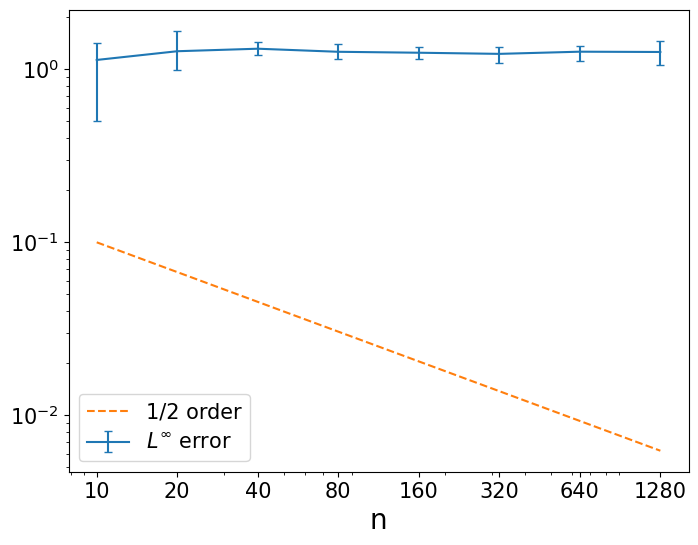

In [ ]:
from statistics import geometric_mean
import matplotlib.pyplot as plt

x = width_vector

print(np.shape(result_matrix))

print(geometric_mean(result_matrix[0,:,1]))

mean = np.zeros(int(len(x)))
mean_inf = np.zeros(int(len(x)))

print(type(mean))

print(mean[0])

for i in range(len(x)):
    mean[i] = geometric_mean(result_matrix[i,:,0])
    mean_inf[i] = geometric_mean(result_matrix[i,:,1])

print(mean)
print(mean_inf)

y_max = np.max(result_matrix[:,:,0], axis = 1)
y_min = np.min(result_matrix[:,:,0], axis = 1)

y_min_inf = np.min(result_matrix[:,:,1], axis = 1)
y_max_inf = np.max(result_matrix[:,:,1], axis = 1)

yerr = np.abs(np.vstack((y_min, y_max)) - mean)

print('y_min: '+str(y_min))
print('y_max: '+str(y_max))
print(yerr)

yerr2 = np.abs(np.vstack((y_min_inf, y_max_inf)) - mean_inf)

x_ref = [x[0], x[-1]]

y_ref = [1E-1, 1E-1/np.sqrt(np.power(2,len(x)))]

ax = plt.figure(figsize=(8, 6))
plt.errorbar(x, mean_inf, yerr=yerr2, capsize = 3, label='$L^\infty$ error')
plt.plot(x_ref, y_ref, linestyle='--', label='1/2 order')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('n', size=20)
plt.legend(fontsize=15)
plt.xticks(x, x, fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('plot.pdf', bbox_inches='tight')
plt.show()